# Prediction of Salary Data  By Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [4]:
df=pd.read_csv('Salary_Data.csv')

In [5]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
df.shape

(30, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
(df==0).sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
pd.set_option('precision',2)

In [12]:
df.describe()

,YearsExperience,Salary
count,30.00,30.00
mean,5.31,76003.00
std,2.84,27414.43
min,1.10,37731.00
25%,3.20,56720.75
50%,4.70,65237.00
75%,7.70,100544.75
max,10.50,122391.00


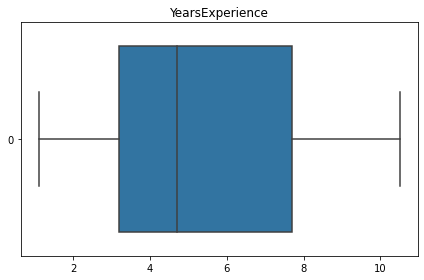

In [13]:
sns.boxplot(data=df['YearsExperience'],orient='h')
plt.title('YearsExperience')
plt.tight_layout()

In [14]:
df['Salary'].nunique()

30

In [15]:
#pariwise correlation of all the columns 

corr_mat=df.corr()
corr_mat

,YearsExperience,Salary
YearsExperience,1.00,0.98
Salary,0.98,1.00


<AxesSubplot:>

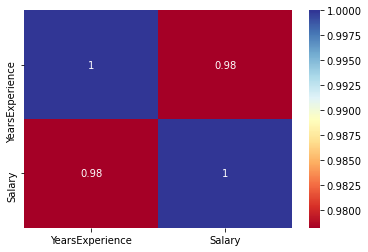

In [16]:
#heatmap of the data

sns.heatmap(corr_mat,annot=True,cmap='RdYlBu')

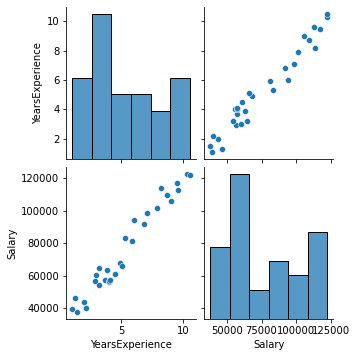

In [17]:
sns.pairplot(df)

Text(0, 0.5, 'Salary')

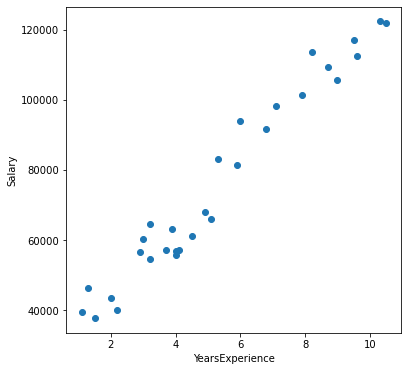

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(x=df['YearsExperience'],y=df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

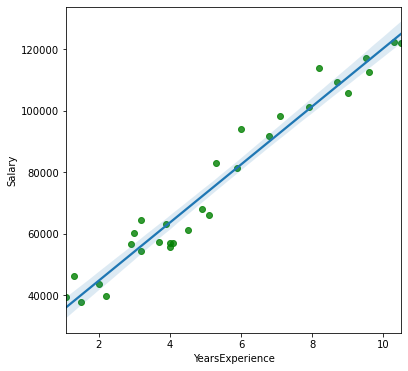

In [19]:
plt.figure(figsize=(6,6))
sns.regplot(x = df['YearsExperience'],y = df['Salary'],scatter_kws = {'color':'g'})

### Linear Regression By Classical method 

In [20]:
df0=pd.DataFrame({'YearsExperience as X':df['YearsExperience'],'Salary as Y':df['Salary']})
df0.head()

,YearsExperience as X,Salary as Y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [21]:
#Calculating the mean of X and Y
mean_X=df['YearsExperience'].sum()/df['YearsExperience'].count()
print('mean_X =',round((mean_X),2))
      
mean_Y=df['Salary'].sum()/df['Salary'].count()
print('mean_Y =',round((mean_Y),2))

mean_X = 5.31
mean_Y = 76003.0


In [22]:
X=df['YearsExperience'].values
Y=df['Salary'].values
n=len(X)
#Using formula for caculating m and c

numer=0
denom=0
for i in range(n):
    numer += (X[i]-mean_X)*(Y[i]-mean_Y)
    denom += (X[i]-mean_X)**2
    m = numer/denom
    c = mean_Y -(m*mean_X)

In [23]:
m

9449.962321455077

In [24]:
c

25792.20019866869

**Y=mx+c**

In [25]:
Y = m*1.3 + c
Y

38077.15121656029

### Linear Regression using methods

In [26]:
import sklearn.linear_model as sk_lm
from sklearn.linear_model import LinearRegression

In [27]:
regg = sk_lm.LinearRegression()

In [28]:
regg

LinearRegression()

In [29]:
X = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary']
regg.fit(X,y)

LinearRegression()

In [30]:
#Intercept of regression line

regg.intercept_

25792.20019866871

In [31]:
#Slope of regreddion line

regg.coef_

array([9449.96232146])

In [32]:
regg.score(X,y)

0.9569566641435086

# We can see that Our values from the Classical Method and Sklearn Model are same.

**Now We can Make Predictions from our model**

In [33]:
regg.predict([[1.1]])

array([36187.15875227])

In [34]:
lt=[]
for x in df['YearsExperience']:
    print(regg.predict([[x]]))
    lt.append(regg.predict([[x]]))

[36187.15875227]
[38077.15121656]
[39967.14368085]
[44692.12484158]
[46582.11730587]
[53197.09093089]
[54142.08716303]
[56032.07962732]
[56032.07962732]
[60757.06078805]
[62647.05325234]
[63592.04948449]
[63592.04948449]
[64537.04571663]
[68317.03064522]
[72097.0155738]
[73987.00803809]
[75877.00050238]
[81546.97789525]
[82491.9741274]
[90051.94398456]
[92886.932681]
[100446.90253816]
[103281.8912346]
[108006.87239533]
[110841.86109176]
[115566.84225249]
[116511.83848464]
[123126.81210966]
[125016.80457395]


In [35]:
"""from itertools import chain
flatten_list = list(chain.from_iterable(lt))
str(flatten_list)"""
result = list(map(float,lt))
result

[36187.15875226929,
 38077.151216560305,
 39967.143680851324,
 44692.12484157886,
 46582.11730586988,
 53197.09093088842,
 54142.08716303393,
 56032.07962732494,
 56032.07962732494,
 60757.060788052484,
 62647.053252343496,
 63592.049484489005,
 63592.049484489005,
 64537.04571663451,
 68317.03064521654,
 72097.01557379858,
 73987.00803808958,
 75877.0005023806,
 81546.97789525366,
 82491.97412739915,
 90051.9439845632,
 92886.93268099973,
 100446.90253816379,
 103281.8912346003,
 108006.87239532784,
 110841.86109176437,
 115566.84225249192,
 116511.83848463741,
 123126.81210965598,
 125016.80457394698]

In [36]:
df1=pd.DataFrame({'Actual': df.Salary,'Predicted': result,'Difference':round((df['Salary']-result),2)})

In [37]:
df1.head()

,Actual,Predicted,Difference
0,39343.0,36187.16,3155.84
1,46205.0,38077.15,8127.85
2,37731.0,39967.14,-2236.14
3,43525.0,44692.12,-1167.12
4,39891.0,46582.12,-6691.12


In [38]:
#Sum of residuals
round((df['Salary']-result),2).sum()

0.0200000000018008

In [39]:
SRS=round((df['Salary']-result),2)**2
SRS.sum()

938128831.3961998

In [40]:
#SRS=round((df1['Difference']),2)**2
#SRS.sum()

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

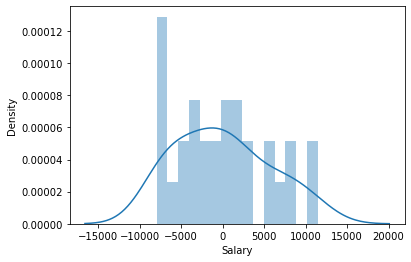

In [41]:
# The sum of weighted residuals

z=round((df['Salary']-result),2)
sns.distplot(z,bins=15)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
Sales_pred=regg.predict(X)               #value of Target variable when we predict it with the Independent variable.
                               
r2_score(df['Salary'],result)

0.9569566641435086

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

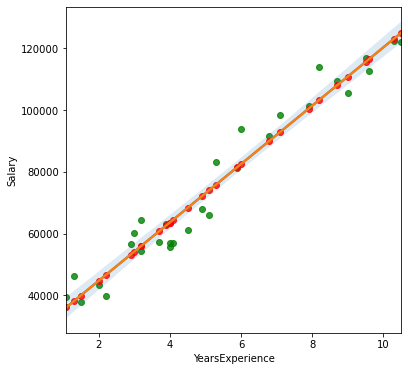

In [44]:
#Actual line
plt.figure(figsize=(6,6))
sns.regplot(x=df['YearsExperience'],y=df['Salary'],scatter_kws = {'color':'g'})
sns.regplot(x=df['YearsExperience'],y=result,scatter_kws = {'color':'r'})

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

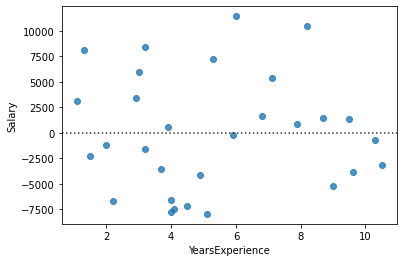

In [45]:
sns.residplot(x=df['YearsExperience'],y=df['Salary'],data=df)

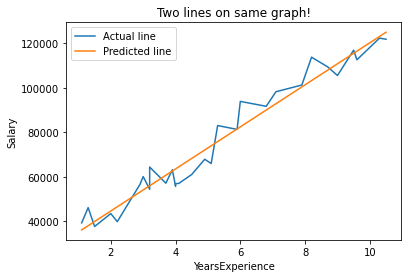

In [46]:
plt.plot(df['YearsExperience'], df['Salary'], label='Actual line')
plt.plot(df['YearsExperience'], result, label='Predicted line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Two lines on same graph!')
plt.legend()

# Analysis done by Shubham 

                                                **Thank You**